# Effects of Borrower features on Loan Status

## Investigation Overview


Prosper is a financial company that matches investors and borrowers in a financially and socially rewarding way.

The goal of this data analysis project is to understand the factors that are related to loans that were charged-off or defaulted. 

## Dataset Overview

There are 113,937 loans in the dataset with 81 features. This analysis will focus on factors that are related to Prosper loans status (`LoanStatus`).

The independent variables of interest are:
- `ProsperScore`
- `ListingCategory`
- `EmploymentStatus`
- `EmploymentStatusDuration`
- `IsBorrowerHomeowner`
- `CurrentCreditLines`
- `OpenRevolvingAccounts`
- `DebtToIncomeRatio`
- `IncomeVerifiable`
- `LoanOriginalAmount`

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan_df = pd.read_csv('raw/prosperLoanData.csv')

In [3]:
# Group all Past Due loans under an unique status
loan_df['LoanStatus'] = loan_df['LoanStatus'].apply(lambda x: x if 'Past Due' not in x else 'Past Due')

# Convert LoanStatus to a categorical variable
loan_status_dict = ['Defaulted','Chargedoff', 'Past Due', 'Current', 'FinalPaymentInProgress', 'Completed']

ordered_loan_status = pd.api.types.CategoricalDtype(ordered = True, categories = loan_status_dict)

loan_df['LoanStatus'] = loan_df['LoanStatus'].astype(ordered_loan_status)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Loan Status Distribution

About 95,000 or 83% of all Prosper loans are current or completed. However, Prosper had approximately 17,000 or 15% of its loans defaulted or charged-off. **Susgesting that Prosper's risk analysts should improve customers analysis before granting loans.**



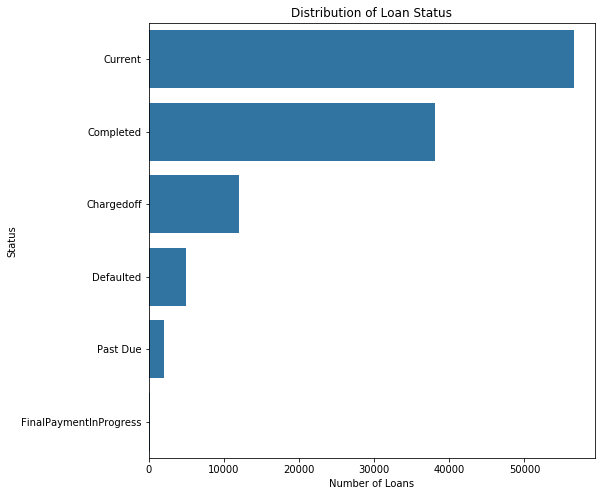

In [11]:
# Plot LoanStatus
plt.figure(figsize = [8, 8])
default_color = sb.color_palette()[0]

# Order the categorical variable type
cat_order = loan_df['LoanStatus'].value_counts().index

sb.countplot(data = loan_df, y = 'LoanStatus', color = default_color, order=cat_order)
plt.title('Distribution of Loan Status')
plt.xlabel('Number of Loans')
plt.ylabel('Status')
plt.show()


## Loan Status vs. Borrower Risk

Taking a closer look at the relationship between loan statuses and the risk attributed by Prosper to each borrower; we noticed that charged-off loans has a lower median ProsperScore than current and completed listings which indicates the need of reviewing on the ProsperScore calculation.

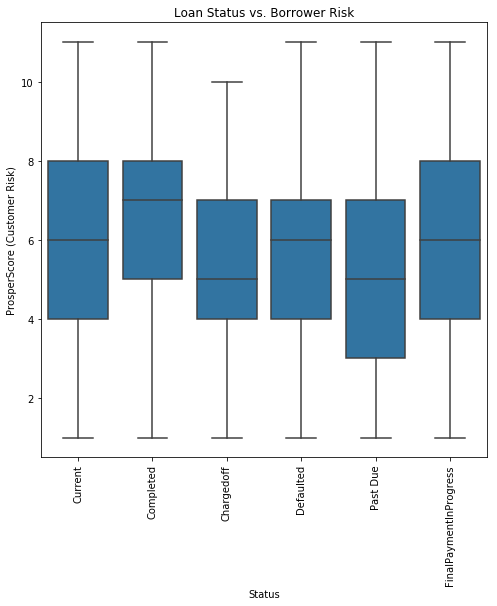

In [9]:
# LoanStatus vs ProsperScore
plt.figure(figsize = [8, 8])
default_color = sb.color_palette()[0]

ax2 = sb.boxplot(data=loan_df, x='LoanStatus', y='ProsperScore', color = default_color, order=cat_order)
plt.title('Loan Status vs. Borrower Risk')
plt.xlabel('Status')
plt.ylabel('ProsperScore (Customer Risk)')
plt.xticks(rotation=90)
plt.show()

## Loan Status vs. Original Loan Amount

Current loans have a higher median original amount than the other statuses. This insight by itself should raise concerning among risk analysts. Hence, we should take into account any external factor or Prosper policy changes that justify this find, which is out of the scope of this project. 

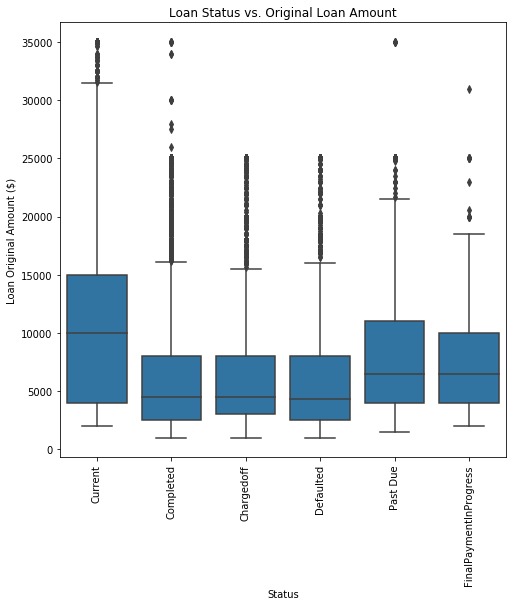

In [8]:
# LoanStatus vs LoanOriginalAmount
plt.figure(figsize = [8, 8])
default_color = sb.color_palette()[0]

ax2 = sb.boxplot(data=loan_df, x='LoanStatus', y='LoanOriginalAmount', color = default_color, order=cat_order)
plt.title('Loan Status vs. Original Loan Amount')
plt.xlabel('Status')
plt.ylabel('Loan Original Amount ($)')
plt.xticks(rotation=90)
plt.show()